In [66]:
#| echo: false  

import numpy as np 
import matplotlib.pyplot as plt 

from IPython.display import Latex as lt
from IPython.display import Markdown as md
from IPython.display import Math
from IPython.display import HTML

from tabulate import tabulate

from IPython.display import display
def printmd(string):
    display(md(string))

from sympy import *
x, y, z, t = symbols('x y z t')


# variável global para contar equações
eq_num = 0
fig_num = 0

<center><font size=6> <b>Algoritmo de Gauss-Jacobi para solução de um sistema linear de n variáveis </b> </font size></center>

\ 

**Bacharelado em Engenharia Elétrica**\ 
**Centro Federal de Educação Tecnológica Celso Suckow da Fonseca**\
**Profs:** &emsp; &emsp; \  Ademilton Luiz Rodrigues de Souza\
&emsp; &emsp; &emsp;&emsp;&emsp;    Daniel Gomes Ribeiro\
**Disciplina**: \ \ \ \ Introdução aos Problemas Inversos\
**Alunos**: \ \ \ \ \ \ \ \  Aluno(a)_1, Aluno(a)_2 ... em ordem alfabética\

\  

# &ensp; Introdução
(Contextualize o problema abordado)
O problema de se determinar xyz aparece em contextos de... Texto aqui, texto aqui, texto aqui, texto aqui, texto aqui, texto aqui, texto aqui, texto aqui, texto aqui, texto aqui, texto aqui, texto aqui, texto aqui, 

Para exibir uma equação, podemos usar uma mistura de código e markdown

In [67]:
#| echo: false  
# forçando um espaço (caso seja necessário). Ao menos a variável eq_num é atualizada ao todar o código. 
# Se rodar várias vezes o mesmo bloco, a numeração estará errada. Ao rodar cada bloco uma vez irá funcionar. Mas assim você terá controle 
# da numeração automática.
eq_num += 1

texto = '$\int _{0}^{1} f(t)dt'+ ' \hspace{10em}$' + ' ('+str(eq_num)+')'
printmd( texto );


# função definida usando a variável x, que foi definida como um símbolo
funct=3*x**2 + 11*x

texto = f'$\int _{0}^{1} { latex(funct) } \ dx'+ ' \hspace{10em}$' 

printmd( texto );



$\int _{0}^{1} f(t)dt \hspace{10em}$ (1)

$\int _0^1 3 x^{2} + 11 x \ dx \hspace{10em}$

Para centralizar sem numerar é fácil: 

In [68]:
#| echo: false  
# jeito certo de centralizar mas sem numerar, com $$ na fórmula


expoente= 6

texto = '$$ \int_{1}^{2} x^' + str(expoente) + ' dt $$'


printmd( (texto) );


$$ \int_{1}^{2} x^6 dt $$

Jeito correto de centralizar com numeração sem usar variável, numerando **manualmente**:

Jeito correto de centralizar com numeração e usando variável: vou precisar "quebrar" os comandos: iniciar um código html para criar uma tabela invisível, em que numa coluna temos a equação (tomando 94% da margem) e em outra temos a numeração (usando os 6% restantes da margem). Depois uso código em Python para inserir a integral (ou qualquer outra expressão) usando o printmd. Encerro o codigo de tabela da primeira coluna, inicio o código da segunda coluna e uso novamente o printmd para imprimir a variável com o numero da euqação

In [69]:
#| echo: false  
# tivemos que quebrar o código HTML e usar o comando de imprimir coisas em latex para o Quarto 
# ordenar as colunas e numerar corretamente as equações
texto = '$$ \int_{1}^{2} x^' + str(expoente) + ' dt $$'
printmd( (texto) );

$$ \int_{1}^{2} x^6 dt $$

In [70]:
#| echo: false  
eq_num += 1
texto = f'$({eq_num})$'
printmd( (texto) );

$(2)$

Para visualizar o documento enquanto edita sem a necessidade de gerar um docx, use o seguinte comando

> **quarto preview .\\template.ipynb**


Para exportar o documento para docx, abra uma prompt de comando na pasta onde está o projeto e digite

> **quarto render .\\template.ipynb --to docx**

Abaixo veja que estamos incluindo uma imagem para ser exibida

<center>

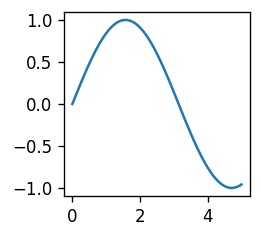

In [71]:
#| echo: false  

#| label: fig-seno(x)-plot
#| fig-cap: "funcão sen(x)"


import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0,5,100);
Y = np.sin(X);

plt.figure(figsize=(2,2), dpi=120);
plt.plot(X,Y);
fig_num +=1


In [72]:
#| echo: false  
printmd('Figura '+str(fig_num)+': um gráfico.')

Figura 1: um gráfico.

</center>

Aqui voltou a ficar na esquerda

# &ensp; Objetivos
O trabalho aqui desenvolvido se propõe a ...
Nosso trabalho tem objetivo de testar...

Como faríamos para exibir uma tabela? Sendo apenas no markdown, seria assim:

|coluna 1| coluna 2|
|:------:|:-------:|
|2       |4        |
|6       |-3       |

Se for necessário incluir valores calculados no python, precisaremos usar o comando do printmd, como abaixo:

In [73]:
#| echo: false  

table = [ ['Linha 1', -4.5, 3.17], ['Linha 2', 15.5, -89], ['Linha 3', 1, -9] ]

printmd(tabulate(table, headers=['Coluna 1', 'Coluna 2', 'Coluna 3']))



Coluna 1      Coluna 2    Coluna 3
----------  ----------  ----------
Linha 1           -4.5        3.17
Linha 2           15.5      -89
Linha 3            1         -9

Claro que você também pode usar o modo markdown por conveniência: 

In [74]:
table = '|coluna 1| coluna 2|\n|:------:|:-------:|\n|2       |4        |\n|6       |-3       |'

printmd(table)

|coluna 1| coluna 2|
|:------:|:-------:|
|2       |4        |
|6       |-3       |

E se precisar incluir variável numérica ou uma equação em latex?

In [75]:
fun = x*x+x
INT = Integral(fun, (x,0,1))

INT_print = f'${latex(INT)}$'

table = f'|coluna 1| coluna 2|\n|:------:|:-------:|\n|2       |4        |\n|6       |'+(INT_print)+'       |'

printmd( table )

|coluna 1| coluna 2|
|:------:|:-------:|
|2       |4        |
|6       |$\int\limits_{0}^{1} \left(x^{2} + x\right)\, dx$       |

# &ensp; Metodologia
(Explique como o método usado, as etapas)
foi implementado o algoritmo xyz para resolver o problema A. Esse algoritmo é composto das seguintes etapas...

## &ensp; Algoritmo 1
Aqui fazemos A

## &ensp; Algoritmo 2
Aqui fazemos B

# &ensp;Resultados obtidos
(Apresente os resultados dos experimentos, cálculos etc)
O algoritmo proposto foi implementado em Python (código disponível nos anexos). os dados...






Como criar uma matriz? Precisamos usar o latex

$\begin{matrix} 11 & 23 \\ 34 & 45 \end{matrix}$


E se for fução definida por partes?

$f(x) = \begin{cases} x^2+1 & se \ x <1 \\ 3-x^3 & se \ x>=1 \end{cases}$

# &ensp; Análise
(Apresente vantagens e desvantagens do método proposto)
Com os experimentos apresentados na seção anterior, foi possível observar que....

# &ensp; Conclusões
(O fechamento do seu documento)
Neste relatório, foi explorado o problema de X. A implementação da solução...
Os resultados parecem estar de acordo...
Os pontos A e B ainda precisam ser explorados...

# &ensp; Referências
(Referencie toda teoria ou outros trabalhos citados no texto – forma livre, mas ordenada)
[1] A.B. SMITH, C.D. JONES, e E.F. ROBERTS, “Título do artigo”, Jornal, Editora, Data, pp. 1-10. 
[2] JONES, C.D., A.B. SMITH, e E.F. ROBERTS, Título do Livro, Editora, Data. 
[3] Sites da Internet: www.adobe.com, acesso em 10/09/2010.